# Exploring Mental Health Data: Predicting Depression with Data Science... by Anand CJ

# Start

# Set up: Import libraries and read data files

In [ ]:
############################################################################################################
## Set the path using google collab note book and data files [train and test] placed in github ##
############################################################################################################

%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/nandukrsna/PT-Hotseat/refs/heads/main/'

    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
####################################
## Import required python libraries ##
####################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer

In [ ]:
############################################################
## Load Data into train, test and submission df ##
############################################################
train_path = DATA_PATH + "train.csv"
test_path = DATA_PATH + "test.csv"
submission_path = DATA_PATH + "sample_submission.csv"

train_data_rw = pd.read_csv(train_path)
test_data_rw = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

train_data_rw.shape, test_data_rw.shape, submission.shape


((140700, 20), (93800, 19), (93800, 2))

# Data Pre-Processing, Exploratory Data Analysis

In [ ]:
###################################################################################################
## Explore the Data. Understanding the structure and content of training and test datasets ##
###################################################################################################
print(set(train_data_rw.columns) - set(test_data_rw.columns))
print(' Train columns ', train_data_rw.columns)
print(' Train shape ', train_data_rw.shape)
print(' Train feature types ', train_data_rw.dtypes)
print(' Test columns ', test_data_rw.columns)
print(' Test shape ', test_data_rw.shape)
print(' Test feature types ', test_data_rw.dtypes)

{'Depression'}
 Train columns  Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
 Train shape  (140700, 20)
 Train feature types  id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisf

In [ ]:
train_data_rw.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [ ]:
test_data_rw.describe(exclude = 'number')

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,93800,93800,93800,93800,69168,93800,93795,93798,93800,93800
unique,374,2,68,2,64,31,22,87,2,2
top,Rohan,Male,Kalyan,Working Professional,Teacher,Less than 5 hours,Moderate,Class 12,No,No
freq,2112,51262,4387,75028,16385,25661,33018,9812,47375,47118


Depression
0    115133
1     25567
Name: count, dtype: int64
Depression
0    0.818287
1    0.181713
Name: proportion, dtype: float64


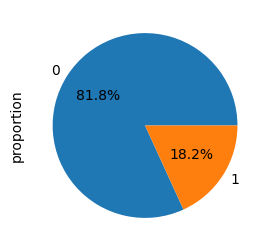

0
 Baseline accuracy based on Majority class  81.82871357498223


In [ ]:
## Majority class and baseline accuracy
print(train_data_rw['Depression'].value_counts())
print(train_data_rw['Depression'].value_counts(normalize = True))

train_data_rw['Depression'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (3,3))
plt.show()

## get the majority class into a variable
majority_class = train_data_rw['Depression'].value_counts().idxmax()
print(majority_class)

## Print Baseline Accuracy based on majority class
baseline_accuracy_maj = train_data_rw['Depression'].value_counts().max() / len(train_data_rw)
print(' Baseline accuracy based on Majority class ' , baseline_accuracy_maj * 100)

In [ ]:
###################################################################################################
## Explore the Data. Understanding missing values of training and test datasets ##
###################################################################################################
print(train_data_rw.isnull().sum().sort_values(ascending = False))
print('======================')
print(test_data_rw.isnull().sum().sort_values(ascending = False))


Study Satisfaction                       112803
Academic Pressure                        112803
CGPA                                     112802
Profession                                36630
Work Pressure                             27918
Job Satisfaction                          27910
Dietary Habits                                4
Financial Stress                              4
Degree                                        2
Family History of Mental Illness              0
Work/Study Hours                              0
Have you ever had suicidal thoughts ?         0
id                                            0
Sleep Duration                                0
Name                                          0
Working Professional or Student               0
City                                          0
Age                                           0
Gender                                        0
Depression                                    0
dtype: int64
CGPA                       

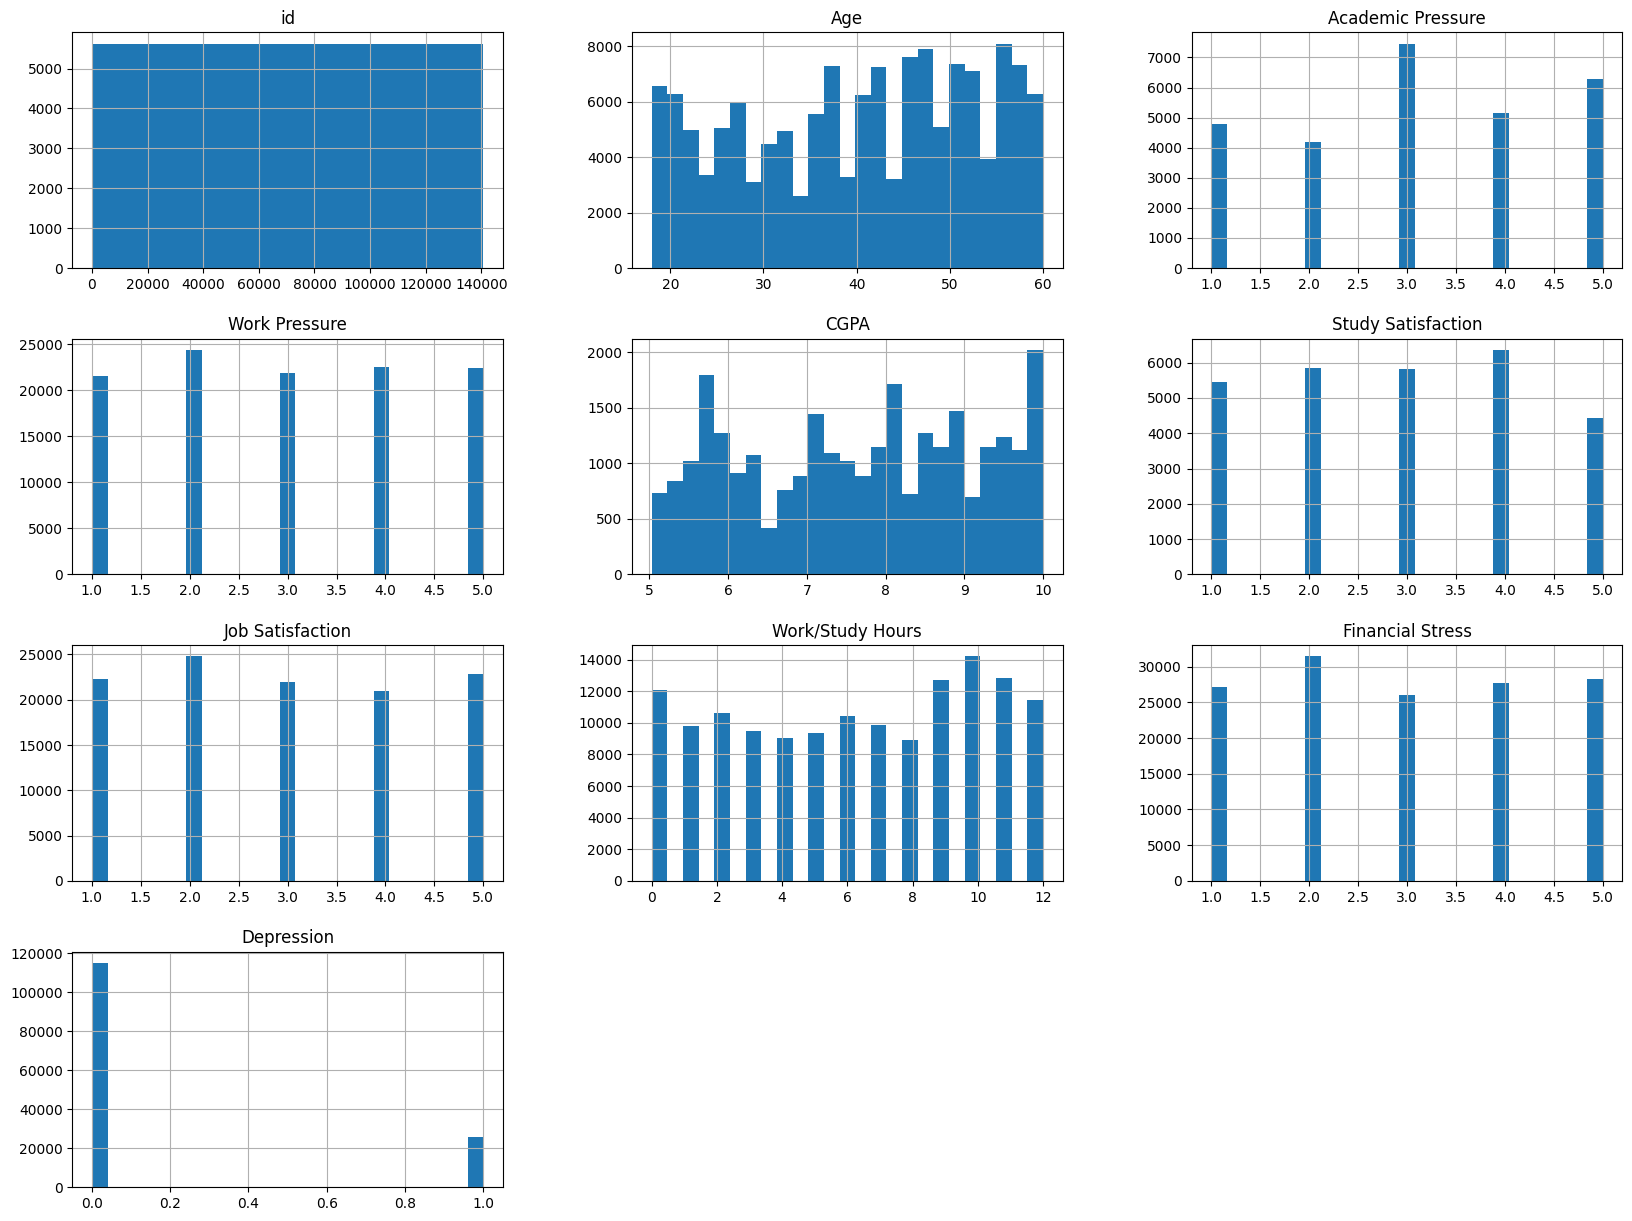

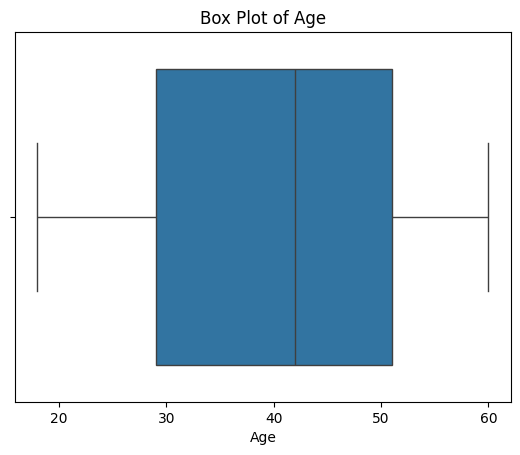

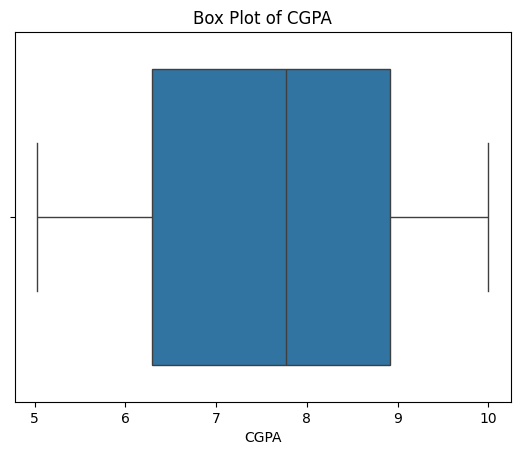

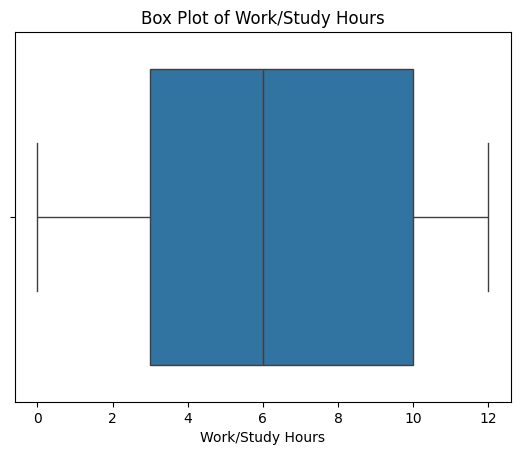

In [ ]:
########################################
## Explore the Data through Plots ##
########################################
# Matplotlib histogram
train_data_rw.hist(bins=25, figsize=(20,15))
plt.show()

# seaborn box plot
sns.boxplot(x=train_data_rw['Age'])
plt.title('Box Plot of Age')
plt.show()

# seaborn box plot
sns.boxplot(x=train_data_rw['CGPA'])
plt.title('Box Plot of CGPA')
plt.show()

# seaborn box plot
sns.boxplot(x=train_data_rw['Work/Study Hours'])
plt.title('Box Plot of Work/Study Hours')
plt.show()

In [ ]:
##########################################################################################################
## PreProcess the Data. Drop Irrevalant columns, Handling missing values of training and test data  ##
##########################################################################################################
# Drop columns which are not relevant
columns_to_drop = ['Name', 'City']
train_data = train_data_rw.drop(columns=columns_to_drop)
test_data = test_data_rw.drop(columns=columns_to_drop)

print(train_data.shape, test_data.shape, ' are train and test df after column drops')

# Seperate features and target from training data - X features y target
X = train_data.drop(columns=['Depression'])
y = train_data['Depression']
print(X.shape, y.shape, '  are X and y df after seperating features and target')

# from X, identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
print(categorical_cols, '===============', numerical_cols)

# Handling missing values
    # for numerical columns, missing values are replaced with median values in Simple Imputer. then do Standard Scaler
    # for categorical columns, missing values are replaced with most frequent value in Simple Imputer. then do Onehot encoding

# Pre processing for numerical and categorical columns to handle missing values

# numerical
num_preprocessor = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

# categorical
cat_preprocessor = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine both # cat_preprocessor and # num_preprocessor into a coulmn transformer
preprocessor = ColumnTransformer(transformers=[('num', num_preprocessor, numerical_cols), ('cat', cat_preprocessor, categorical_cols)])

preprocessor

(140700, 18) (93800, 17)  are train and test df after column drops
(140700, 17) (140700,)   are X and y df after seperating features and target
Index(['Gender', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object') =============== Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Gender', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object'))])

# Build classification model for baseline - Logistic Regression

In [ ]:
######################################################
## Build a baseline model - Logistic Regression  ##
######################################################

# Logistic regression model
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state = 42))])

# Training, Validation data split
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and Train the Logistic regression
logistic_pipeline.fit(X_train_log, y_train_log)

# Train accuracy
train_accuracy_log = logistic_pipeline.score(X_train_log, y_train_log)
print(f"Train Accuracy from Logistic Regression: {train_accuracy_log}")

# Validation accuracy
val_accuracy_log = logistic_pipeline.score(X_val_log, y_val_log)
print(f"Validation Accuracy from Logistic Regression: {val_accuracy_log}")

# Predict and Evaluate the Logistic regression
y_val_pred_log = logistic_pipeline.predict(X_val_log)

accuracy_Logistic = accuracy_score(y_val_log, y_val_pred_log)
print(f"Accuracy from Logistic Regression: {accuracy_Logistic}")

# AUC for Logistic Regression
from sklearn.metrics import roc_auc_score
auc_Logistic = roc_auc_score(y_val_log, y_val_pred_log)
print("AUC for Logistic Regression:", auc_Logistic)

Train Accuracy from Logistic Regression: 0.9394012082444918
Validation Accuracy from Logistic Regression: 0.9364250177683013
Accuracy from Logistic Regression: 0.9364250177683013
AUC for Logistic Regression: 0.8857500901242007


In [ ]:
# Cross-validation for Logistic Regression
logistic_scores = cross_val_score(logistic_pipeline, X, y, cv=10, scoring='accuracy')
print("Logistic Regression Baseline Accuracy:", logistic_scores.mean())

Logistic Regression Baseline Accuracy: 0.9386780383795308


# Build a Decision Tree Model

In [ ]:
######################################################
## Build a robust model - Decision Tree Regression  ##
######################################################

# Use pipeline, preprocessor to build the Decision Tree model
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state = 42, max_depth = 10))])

# split data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and Train the Decision Tree model
decision_tree_pipeline.fit(X_train, y_train)


# Train accuracy
train_accuracy_dt = decision_tree_pipeline.score(X_train, y_train)
print(f"Train Accuracy from Decision Tree: {train_accuracy_dt}")

# Validation accuracy
val_accuracy_dt = decision_tree_pipeline.score(X_val, y_val)
print(f"Validation Accuracy from Decision Tree: {val_accuracy_dt}")

# Predict and Evaluate the Decision Tree  model
y_val_pred = decision_tree_pipeline.predict(X_val)

accuracy_DecisionTree = accuracy_score(y_val, y_val_pred)
print(f"Accuracy from Decision Tree: {accuracy_DecisionTree}")

Train Accuracy from Decision Tree: 0.9398809523809524
Validation Accuracy from Decision Tree: 0.928820184790334
Accuracy from Decision Tree: 0.928820184790334


# Decision Tree Model performance

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     22986
           1       0.81      0.79      0.80      5154

    accuracy                           0.93     28140
   macro avg       0.88      0.88      0.88     28140
weighted avg       0.93      0.93      0.93     28140

Confusion Matrix:
 [[22059   927]
 [ 1076  4078]]


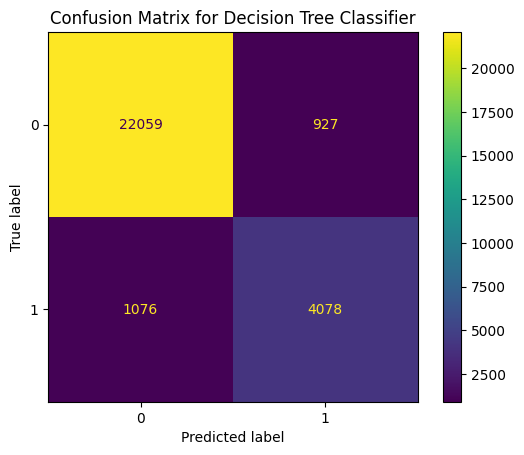

In [ ]:
# classification report - to evaluate metrics Precision, Recall, F1 score
classification_report_DecisionTree = classification_report(y_val, y_val_pred)
print("Classification Report:\n", classification_report_DecisionTree)

# confusion matrix
confusion_matrix_DecisionTree = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", confusion_matrix_DecisionTree)

# Plot confusion matrix as a heatmap
CMDisp_DecisionTree = ConfusionMatrixDisplay(confusion_matrix_DecisionTree)
CMDisp_DecisionTree.plot()
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# Decision Tree - Feature Importances

In [ ]:
# get feature names from preprocessor since columns would have changed due to preprocessing steps like onehot encoding

# Decision Tree model Feature importances
transformed_feature_names = preprocessor.get_feature_names_out()
print(len(transformed_feature_names))

# pipeline named steps to get coefficients coef_
decision_tree_model = decision_tree_pipeline.named_steps['classifier'].feature_importances_
print(len(decision_tree_model))

# dataframe for coefficients using the transformed_feature_names and decision_tree_model
feature_importance_df = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': decision_tree_model})
feature_importance_df.sort_values(by='Importance', ascending = False)

# feature importances df bar plot
# feature_importance_df.sort_values(by='Importance', ascending=False).plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
# plt.title('Decision Tree Feature Importances')
# plt.xlabel('Features')
# plt.ylabel('Importance')

# AUC for Decision Tree
from sklearn.metrics import roc_auc_score
auc_DecisionTree = roc_auc_score(y_val, y_val_pred)
print("AUC for Decision Tree:", auc_DecisionTree)


231
231
AUC for Decision Tree: 0.8754506083421533


# Test and Validation

In [ ]:
# Cross-validation Decision Tree
decision_tree_scores = cross_val_score(decision_tree_pipeline, X, y, cv=10, scoring='accuracy')
print("Decision Tree Baseline Accuracy:", decision_tree_scores.mean())


Decision Tree Baseline Accuracy: 0.9253731343283581


In [ ]:
test_data.shape
test_data.head(1)
# Generate predictions for test data set
y_test_pred = decision_tree_pipeline.predict(test_data)
y_test_pred

array([0, 0, 0, ..., 0, 1, 0])

# Prepare and Save submission file

In [ ]:
# Save Submission File
submission['Depression'] = y_test_pred # second column for predicted depression values
submission.to_csv('submission_decision_tree.csv', index=False)
print("Submission file saved as 'submission_decision_tree.csv'")

Submission file saved as 'submission_decision_tree.csv'


# Finish